# Estimación Edad Cerebral mayores de 40 años

In [1]:
path=  'C:/Users/felipe/Documents/Brain/'

In [2]:
import sys
sys.path.append(path) 

In [3]:

import xgboost as xgb
from base_regressor import BaseRegressor
from skopt.space import Real, Categorical, Integer

class XGBoostRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None,model_params_search=None,fit_params_train=None,model_params_train=None, name_model="XGBoost"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search ,model_params_search,fit_params_train ,model_params_train, name_model)
        
        self.model_ml = xgb.XGBRegressor
        if params is None:
            self.params = {
                'objective': 'reg:squarederror',
                'n_estimators': 100,
                'learning_rate': 0.1,
                'max_depth': 3,
                'subsample': 0.8,
                'colsample_bytree': 0.8
            }
        if params_space is None:
            self.params_space = {
                'n_estimators': Integer(50, 5000),
                'learning_rate': Real(0.01, 0.2, prior='log-uniform'),
                'max_depth': Integer(3, 10),
                'subsample': Real(0.6, 1.0),
                'colsample_bytree': Real(0.6, 1.0)
            }

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import pandas as pd
import numpy as np
import pickle

file_name = 'dataframe_alpha.xlsx'
file_path = f"{path}{file_name}"

df = pd.read_excel(file_path)
# Filtrar las filas con Age mayor de 20
df_filtrado = df[df['Age'] > 40].reset_index(drop=True)
X = df_filtrado.drop(columns=["Unnamed: 0", "Age"])
y = df_filtrado["Age"]

xgb_model = XGBoostRegressor()
xgb_model.set_data(X,y)

In [5]:
df_filtrado

,Unnamed: 0,Age,Alpha2_canon_EPP_HPC_left,Alpha2_canon_EPP_HPC_right,Alpha2_canon_EPP_PARIET_left,Alpha2_canon_EPP_PARIET_right,Alpha2_canon_EPP_OCC_left,Alpha2_canon_EPP_OCC_right,Alpha2_canon_RPD_HPC_left,Alpha2_canon_RPD_HPC_right,...,IAF_MFG_left,IAF_MFG_right,IAF_SFG_left,IAF_SFG_right,IAF_HPC_left,IAF_HPC_right,IAF_INS_left,IAF_INS_right,IAF_OCC_left,IAF_OCC_right
0,3,57.0,0.014647,0.013471,0.013073,0.013822,0.021933,0.017799,0.002092,0.001924,...,11.375,11.625,11.6875,11.6875,11.500000,11.666667,11.500,11.625,11.375000,11.500000
1,12,42.0,0.021705,0.014934,0.021138,0.019552,0.020463,0.024079,0.003101,0.002133,...,10.500,10.500,10.5625,10.5000,10.666667,10.500000,10.500,10.500,10.500000,10.500000
2,16,41.0,0.011276,0.008766,0.008108,0.013774,0.012341,0.011588,0.001611,0.001252,...,11.625,11.875,11.7500,11.9375,11.583333,12.000000,11.625,12.000,11.750000,11.708333
3,27,44.0,0.023957,0.017935,0.016236,0.018895,0.032697,0.021492,0.003422,0.002562,...,10.375,10.375,10.3750,10.5000,10.250000,10.416667,10.375,10.500,10.333333,10.375000
4,33,42.0,0.007764,0.005040,0.010052,0.008514,0.010440,0.010819,0.001109,0.000720,...,10.250,10.250,10.2500,10.3125,10.250000,9.666667,10.250,10.250,10.250000,10.208333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,1544,48.0,0.007819,0.008175,0.007330,0.009786,0.009443,0.009162,0.001117,0.001168,...,9.875,8.250,8.3125,9.6250,9.583333,11.750000,9.500,10.750,9.750000,9.833333
805,1546,57.0,0.006954,0.006618,0.005141,0.005685,0.007440,0.006692,0.000993,0.000945,...,8.000,10.000,8.0000,8.5625,8.000000,12.000000,8.000,10.000,8.000000,9.041667
806,1548,57.0,0.010784,0.010763,0.007001,0.007620,0.008773,0.008320,0.001541,0.001538,...,9.125,8.500,9.2500,9.0625,8.666667,8.583333,9.000,9.000,8.958333,8.000000
807,1549,69.0,0.011437,0.011171,0.009038,0.011523,0.009255,0.009590,0.001634,0.001596,...,8.000,8.000,9.0625,9.0000,9.333333,8.583333,8.500,8.625,9.916667,9.708333


c:\Users\felipe\Documents\Brain_Age_\brain_age_env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


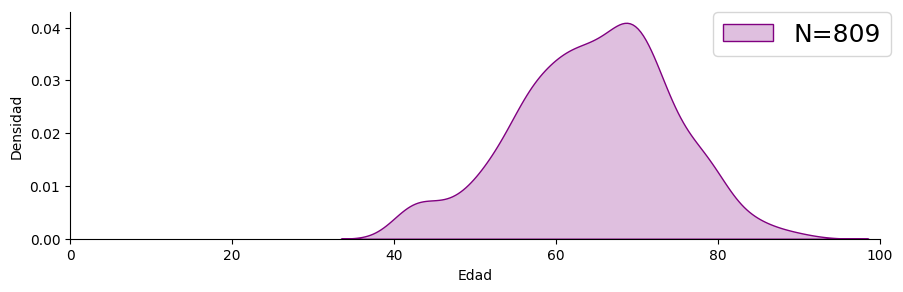

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar las filas con Age mayor de 20
df_filtrado = df[df['Age'] > 40].reset_index(drop=True)

# Contar el número de personas en el DataFrame filtrado
num_personas = df_filtrado.shape[0]

# Crear el FacetGrid
facet = sns.FacetGrid(df_filtrado, aspect=3)
facet.map(sns.kdeplot, 'Age', shade=True, color='purple')  # Cambia el color aquí
facet.set(xlim=(df['Age'].min(), df['Age'].max()))

legend = facet.fig.legend(labels=[f'N={num_personas}'], loc='upper right', prop={'size': 18})

# Añadir la leyenda con el número de personas
#facet.fig.legend(labels=[f'N={num_personas}'], loc='upper right')

# Cambiar los nombres de los ejes
facet.set_axis_labels("Edad", "Densidad")

# Establecer los límites del eje x y mostrar el gráfico
plt.xlim(0, 100)
plt.show()


c:\Users\felip\Documents\Brain_Age_\brain_age_env_2\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


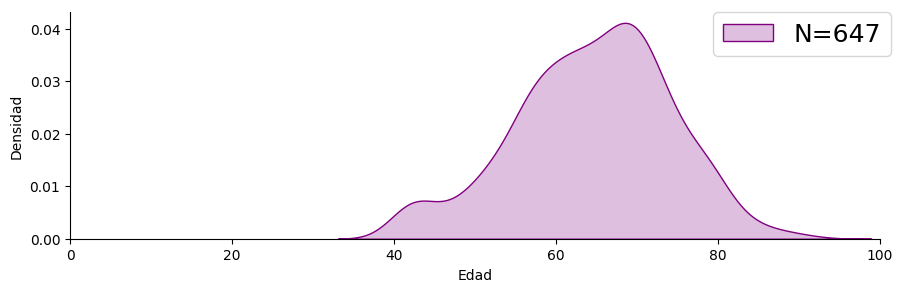

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que xgb_model.y_train es una Serie de pandas con las edades
y_train_df = xgb_model.y_train.reset_index()

# Contar el número de personas en el DataFrame
num_personas = y_train_df.shape[0]

# Crear el FacetGrid
facet = sns.FacetGrid(y_train_df, aspect=3)
facet.map(sns.kdeplot, 'Age', shade=True, color='purple')  # Cambia el color aquí
facet.set(xlim=(df['Age'].min(), df['Age'].max()))

# Añadir la leyenda con el número de personas
legend = facet.fig.legend(labels=[f'N={num_personas}'], loc='upper right', prop={'size': 18})

# Cambiar los nombres de los ejes
facet.set_axis_labels("Edad", "Densidad")

# Establecer los límites del eje x y mostrar el gráfico
plt.xlim(0, 100)
plt.show()


c:\Users\felip\Documents\Brain_Age_\brain_age_env_2\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


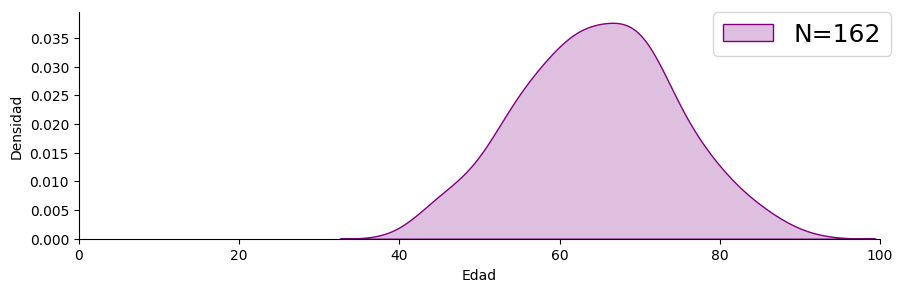

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que xgb_model.y_train es una Serie de pandas con las edades
y_train_df = xgb_model.y_test.reset_index()

# Contar el número de personas en el DataFrame
num_personas = y_train_df.shape[0]

# Crear el FacetGrid
facet = sns.FacetGrid(y_train_df, aspect=3)
facet.map(sns.kdeplot, 'Age', shade=True, color='purple')  # Cambia el color aquí
facet.set(xlim=(df['Age'].min(), df['Age'].max()))

# Añadir la leyenda con el número de personas
legend = facet.fig.legend(labels=[f'N={num_personas}'], loc='upper right', prop={'size': 18})

# Cambiar los nombres de los ejes
facet.set_axis_labels("Edad", "Densidad")

# Establecer los límites del eje x y mostrar el gráfico
plt.xlim(0, 100)
plt.show()


# Busqueda hiperparametros

In [ ]:
opt_xgb_40A, best_params_xgb_40A = xgb_model.search_best_model(n_iter_=400)


In [ ]:
with open('C:/Users/felip/Documents/opt_XGB_model_40A.pickle', 'wb') as file:
        pickle.dump(opt_xgb_40A, file)

In [5]:
with open(f'{path}Opt_Model/opt_XGB_model_40A.pickle', 'rb') as file:
    opt_xgb_40A= pickle.load(file)

c:\Users\felipe\Documents\Brain\base_regressor.py:311: RuntimeWarning: overflow encountered in exp
  return C * (1-np.exp(-t / tau)) + b
c:\Users\felipe\Documents\Brain\base_regressor.py:254: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(self.exponential_decay, t, y_true, p0=[C_true, tau_true, b_true])


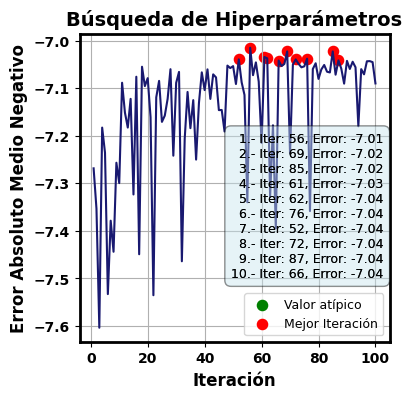

Top 1: Iteración 56, Error -7.014634330670039
Top 2: Iteración 69, Error -7.0224468789345185
Top 3: Iteración 85, Error -7.022498437563579
Top 4: Iteración 61, Error -7.034205054472655
Top 5: Iteración 62, Error -7.03698419411977
Top 6: Iteración 76, Error -7.037619199875072
Top 7: Iteración 52, Error -7.03915003709304
Top 8: Iteración 72, Error -7.039282055053955
Top 9: Iteración 87, Error -7.041247010934048
Top 10: Iteración 66, Error -7.04154234351256


In [6]:
xgb_model.plot_search_best_model(opt_xgb_40A, linewidth=1.5, color='midnightblue', num_max=100)

In [9]:
best_params_xgb = xgb_model.best_hyper(opt_xgb_40A, num_max=100)

In [10]:
best_params_xgb

[{'colsample_bytree': 0.6,
  'learning_rate': 0.031011543328829893,
  'max_depth': 10,
  'n_estimators': 50,
  'subsample': 1.0},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.03371374196724646,
  'max_depth': 10,
  'n_estimators': 50,
  'subsample': 1.0},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.03092947827664299,
  'max_depth': 10,
  'n_estimators': 50,
  'subsample': 1.0},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.033676334284894124,
  'max_depth': 10,
  'n_estimators': 50,
  'subsample': 1.0},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.033342393223245836,
  'max_depth': 10,
  'n_estimators': 50,
  'subsample': 1.0},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.03131428589297841,
  'max_depth': 10,
  'n_estimators': 50,
  'subsample': 1.0},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.047263658704671266,
  'max_depth': 9,
  'n_estimators': 50,
  'subsample': 1.0},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.03373686268743549,
  'max_depth': 10,
  'n_est

In [11]:
xgb_model.fit_params_train = {
                "early_stopping_rounds": 10,
                "eval_metric": "mae",
                "eval_set": [(xgb_model.X_test, xgb_model.y_test)],
                "verbose": True
            }

In [31]:
xgb_model.fit_params_train = {}

In [32]:
results, best_model_results, best_model = xgb_model.trainer(params_=best_params_xgb[0])

In [33]:
with open(f'{path}Opt_Model/BestModel_XGB_all_features_40A.pickle', 'wb') as file:
    pickle.dump(best_model, file)
with open(f'{path}Opt_Model/results_XGB_model_all_features_40A.pickle', 'wb') as file:
    pickle.dump(results, file)

In [16]:
with open(f'{path}Opt_Model/BestModel_XGB_all_features_40A.pickle', 'rb') as file:
    model =  pickle.load(file)
    
with open(f'{path}Opt_Model/results_XGB_model_all_features_40A.pickle', 'rb') as file:
    results =  pickle.load(file)

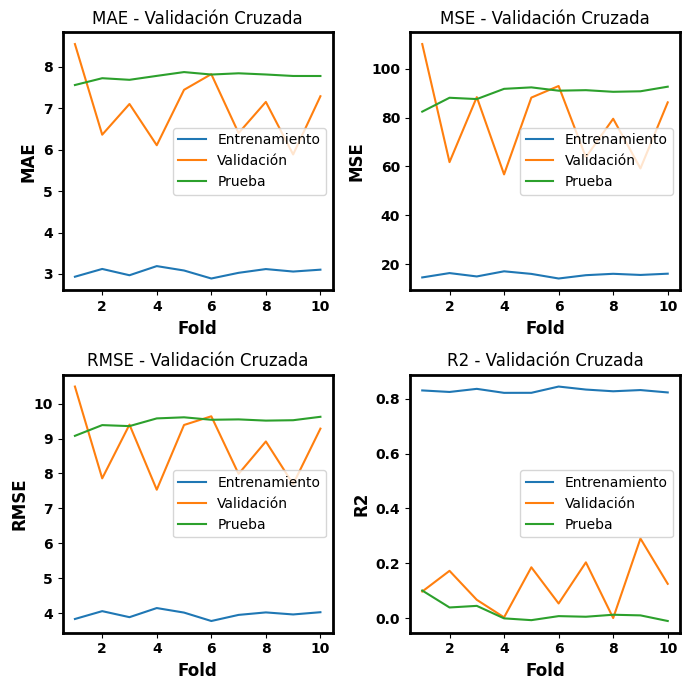

In [34]:
xgb_model.plot_metricas_evaluacion(results)

In [35]:
y_pred=xgb_model.predicter(xgb_model.X_test)

In [12]:
y_test_array = xgb_model.y_test.to_numpy()

In [14]:
with open('C:/Users/felip/Documents/edad_real_40A_pandas.pickle', 'wb') as file:
        pickle.dump(xgb_model.y_test, file)
with open('C:/Users/felip/Documents/edad_real_40A_array.pickle', 'wb') as file:
        pickle.dump(y_test_array, file)
with open('C:/Users/felip/Documents/edad_predicha_40A_array.pickle', 'wb') as file:
        pickle.dump(y_pred, file)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     5.865
Date:                Thu, 15 Aug 2024   Prob (F-statistic):             0.0166
Time:                        00:49:32   Log-Likelihood:                -421.25
No. Observations:                 162   AIC:                             846.5
Df Residuals:                     160   BIC:                             852.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.4753      1.760     34.355      0.0

c:\Users\felipe\Documents\Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


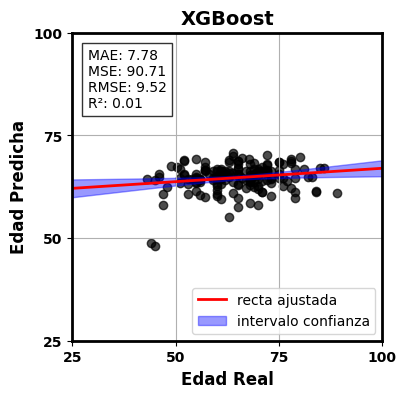

Error medio absoluto: 7.782425947150086
Error cuadrático medio: 90.70574397407314
Raíz del error cuadrático medio: 9.523956319412282
Coeficiente de determinación (R²): 0.01022368375752769


In [36]:
xgb_model.plot_regresion(y=y_pred,x= xgb_model.y_test, x_size=4,x_ticks_step=25,y_ticks_step=25,x_min_limit=25,y_min_limit=25,x_max_limit=100,y_max_limit=100,color='black', title='XGBoost',color_line_ideal='gray',  alpha=0.7,line_ideal=False,xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

In [37]:
y_pred_train=xgb_model.predicter(xgb_model.X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     5254.
Date:                Thu, 15 Aug 2024   Prob (F-statistic):          3.41e-312
Time:                        00:49:41   Log-Likelihood:                -1354.3
No. Observations:                 647   AIC:                             2713.
Df Residuals:                     645   BIC:                             2722.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.9370      0.524     51.422      0.0

c:\Users\felipe\Documents\Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


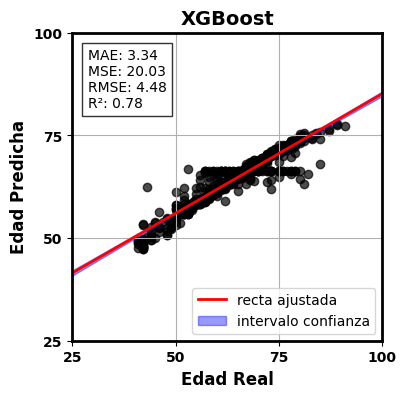

Error medio absoluto: 3.33833590492276
Error cuadrático medio: 20.027858894637827
Raíz del error cuadrático medio: 4.475249590205872
Coeficiente de determinación (R²): 0.7837343256376371


In [38]:
xgb_model.plot_regresion(y=y_pred_train,x= xgb_model.y_train, x_size=4,x_ticks_step=25,y_ticks_step=25,x_min_limit=25,y_min_limit=25,x_max_limit=100,y_max_limit=100,color='black', title='XGBoost',color_line_ideal='gray',  alpha=0.7,line_ideal=False,xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

In [39]:
residuals = xgb_model.predicter(xgb_model.X_train)-xgb_model.y_train.to_numpy() 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     2708.
Date:                Thu, 15 Aug 2024   Prob (F-statistic):          4.50e-233
Time:                        00:49:58   Log-Likelihood:                -1354.3
No. Observations:                 647   AIC:                             2713.
Df Residuals:                     645   BIC:                             2722.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.9370      0.524     51.422      0.0

c:\Users\felipe\Documents\Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


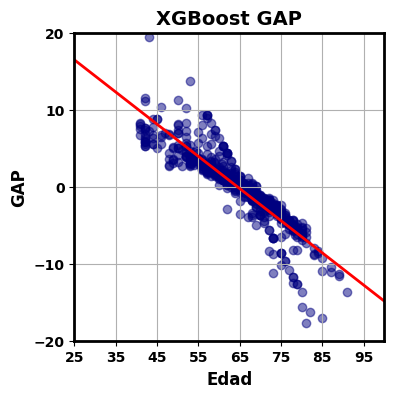

Error medio absoluto: 64.5452222435945
Error cuadrático medio: 4356.127098498513
Raíz del error cuadrático medio: 66.00096286038949
Coeficiente de determinación (R²): -46.03851617494533


In [40]:
xgb_model.plot_regresion(y=residuals,x=xgb_model.y_train,line_ideal=False,confidence_interval=False,x_min_limit=25,x_max_limit=100,legend=False,legend_metrics=False, title='XGBoost GAP', xlabel='Edad', ylabel='GAP')

In [41]:
y_pred_corrected=xgb_model.predicter_corrected()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     322.2
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           3.58e-40
Time:                        01:05:47   Log-Likelihood:                -421.25
No. Observations:                 162   AIC:                             846.5
Df Residuals:                     160   BIC:                             852.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.5383      1.760     19.053      0.0

c:\Users\felipe\Documents\Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


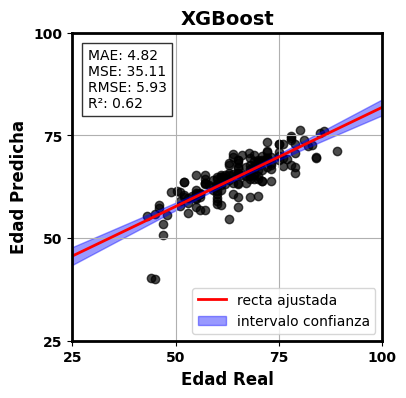

Error medio absoluto: 4.818457279246167
Error cuadrático medio: 35.11343207149927
Raíz del error cuadrático medio: 5.925658787974487
Coeficiente de determinación (R²): 0.6168440726720366


In [47]:
xgb_model.plot_regresion(y=y_pred_corrected,x= xgb_model.y_test, x_size=4,x_ticks_step=25,y_ticks_step=25,x_min_limit=25,y_min_limit=25,x_max_limit=100,y_max_limit=100,color='black', title='XGBoost',color_line_ideal='gray',  alpha=0.7,line_ideal=False,xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

# SHAP

In [52]:
shap_values, shap_summary_sorted = xgb_model.feature_importance_shap(X_test=xgb_model.X_test,model=xgb_model.model)

Importancia de características basada en suma de valores SHAP:
High_subj_spec_EPP_HPC_left: 82.58583068847656
IAF_OCC_left: 82.17539978027344
Low_subj_spec_EPP_HPC_left: 59.218833923339844
Low_subj_spec_EPP_OCC_right: 47.51367950439453
High_subj_spec_EPP_CING_right: 47.17716598510742
Low_subj_spec_RPD_PARIET_right: 32.97649002075195
Alpha2_canon_EPP_OCC_right: 32.610260009765625
Low_subj_spec_EPP_OCC_left: 29.423446655273438
Alpha2_canon_EPP_OCC_left: 29.372909545898438
Alpha2_canon_EPP_HPC_right: 28.222726821899414
IAF_INS_right: 28.039194107055664
Low_subj_spec_EPP_PARIET_right: 26.420154571533203
Low_subj_spec_RPD_HPC_right: 25.233612060546875
High_subj_spec_RPD_HPC_left: 24.458053588867188
High_subj_spec_EPP_PARIET_right: 24.441513061523438
Alpha2_canon_EPP_HPC_left: 22.793256759643555
High_subj_spec_RPD_CING_right: 21.33511734008789
High_subj_spec_EPP_OCC_left: 21.135465621948242
TF_SFG_left: 20.84241485595703
Alpha2_canon_RPD_CING_right: 18.944841384887695
Low_subj_spec_RPD_CING_

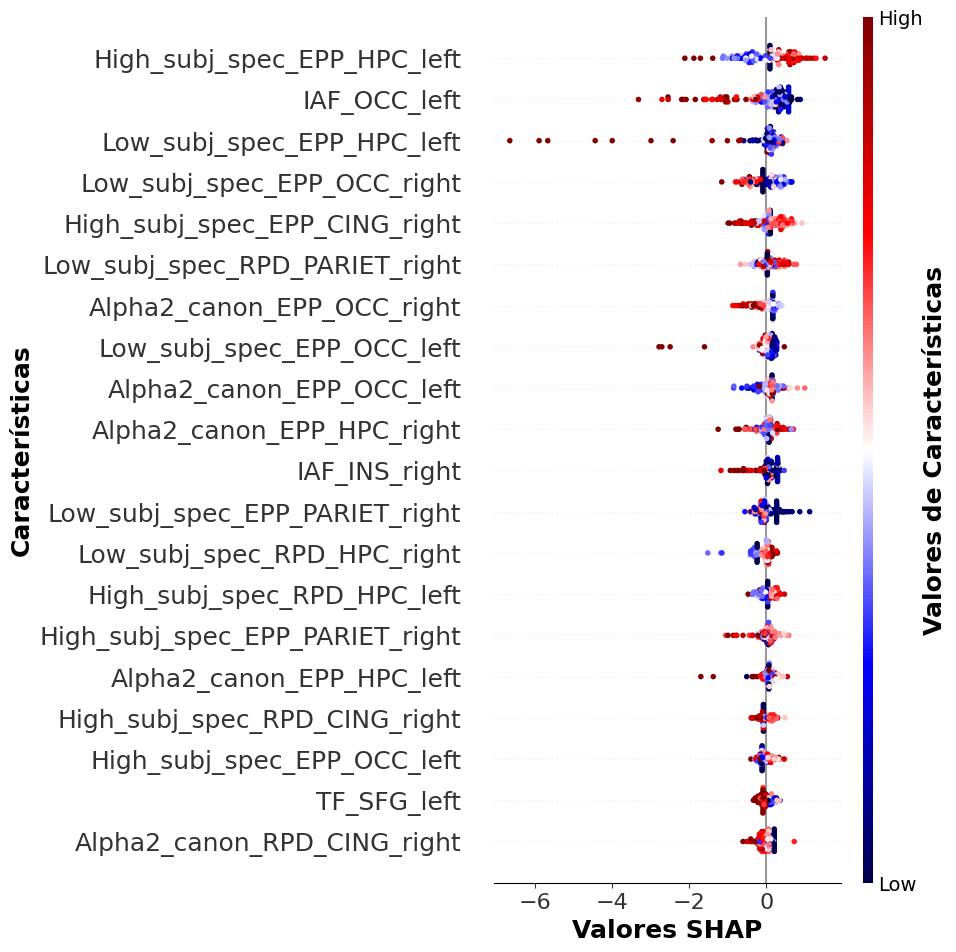

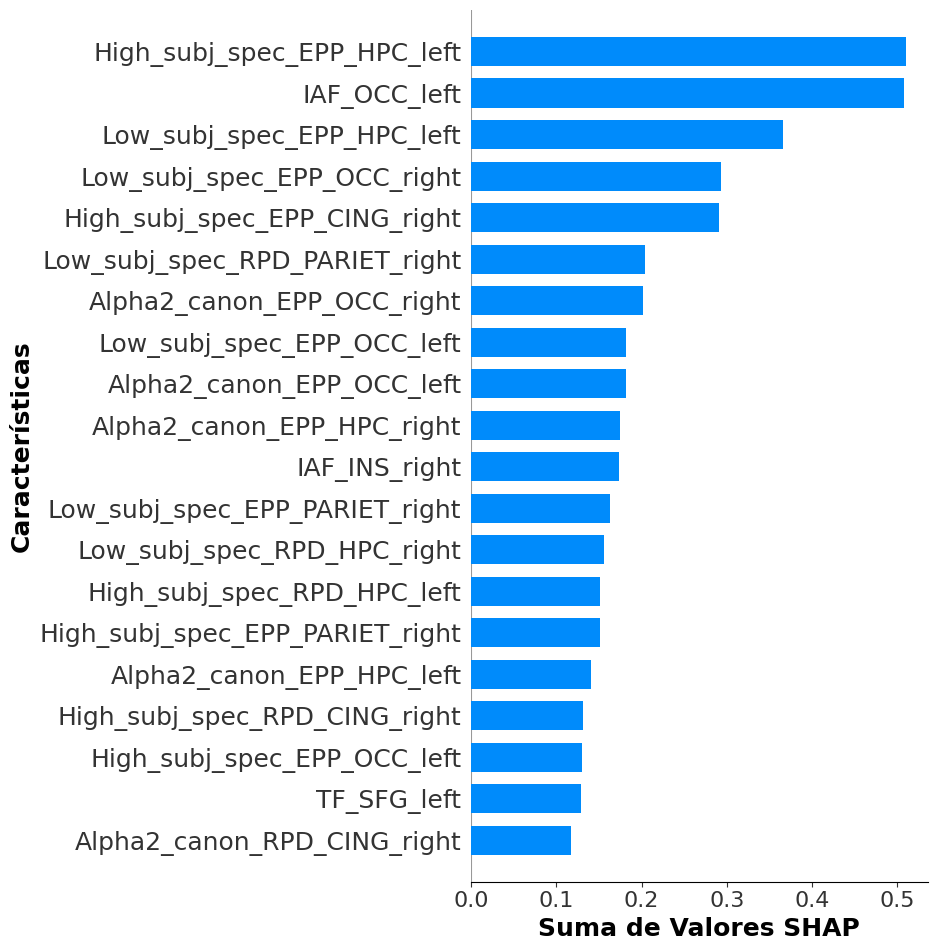

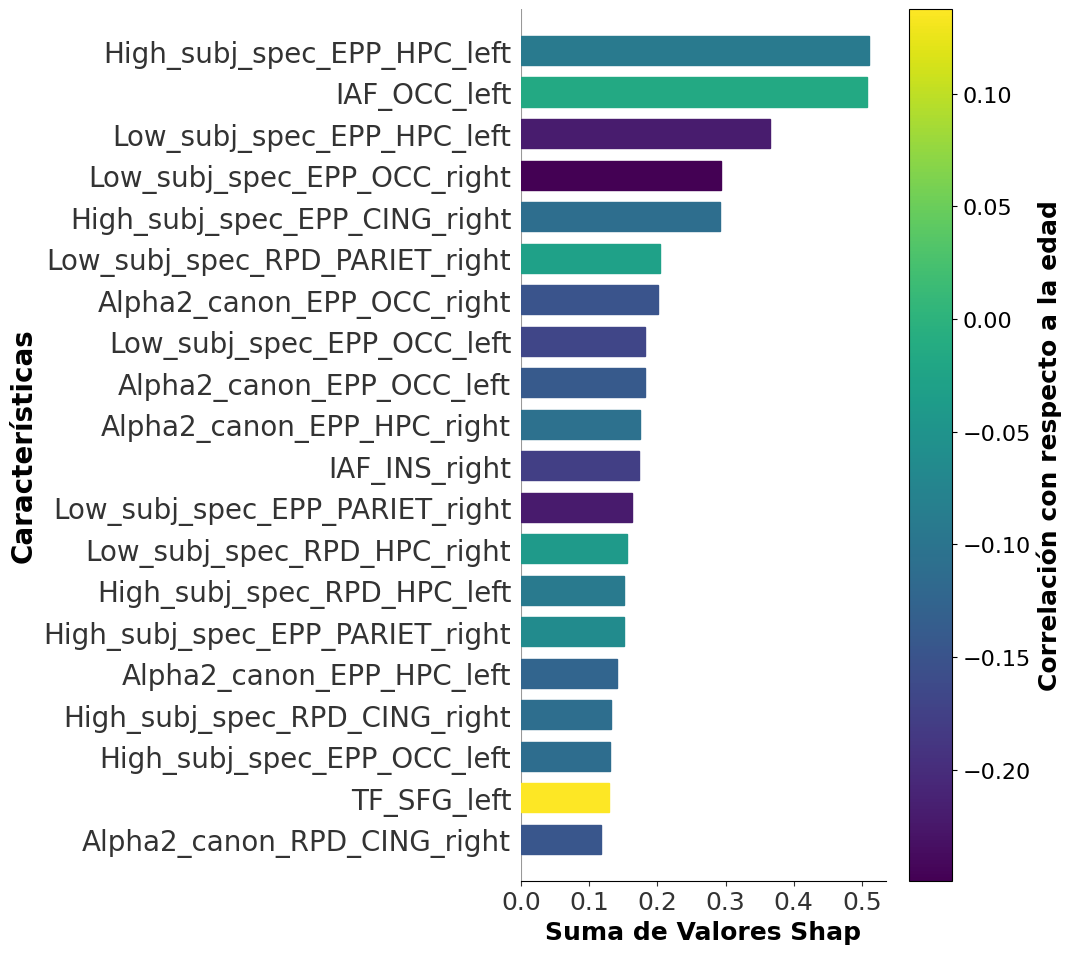

In [53]:
xgb_model.plot_feature_importance(shap_values=shap_values,X_test=xgb_model.X_test,y_test=xgb_model.y_test)

In [33]:
shap_por_region_sorted, resultado_normalizado_sorted=xgb_model.shap_region(shap_summary_sorted=shap_summary_sorted, num_max=20)

HPC_left: 1.000000
OCC_left: 0.766073
CING_right: 0.573165
OCC_right: 0.462021
PARIET_right: 0.453979
HPC_right: 0.299284
INS_right: 0.152215
SFG_left: 0.108678


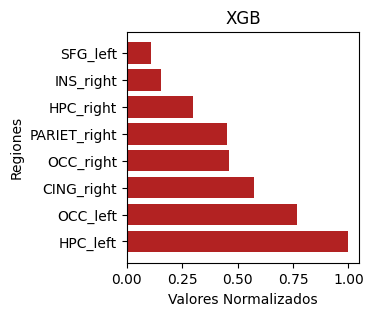

In [34]:
xgb_model.plot_normalized_values(resultado_normalizado_sorted, color='firebrick', name_set='XGB',x_size=3,y_size=3)

c:\Users\felip\Documents\Brain_Age_\brain_age_env_2\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


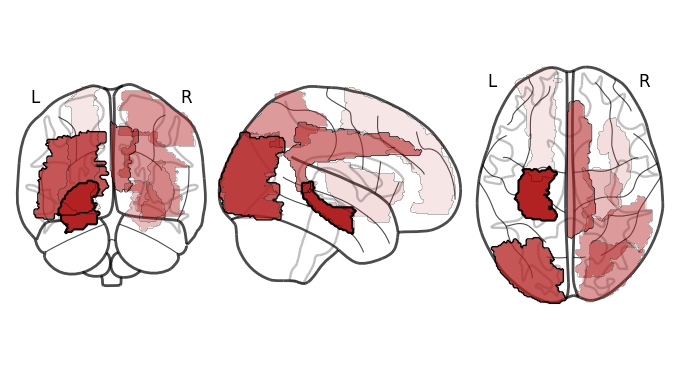

In [36]:
base_path = 'C:/Users/felip/Documents/brain_age_/cerebritos/'

xgb_model.plot_brain_regions(resultado_normalizado_sorted, base_path, color='firebrick')